In [1]:
import os
os.environ['MLFLOW_TRACKING_USERNAME']= "aboussabounrania"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "271960fb514a607ea667c6792df82c4fc9571162"


In [2]:

os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/aboussabounrania/mlopschurnproject.mlflow'
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [3]:
import pandas as pd
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
from pycaret.classification import *
s = setup(data, target = 'Churn', session_id = 123, ignore_features = ['customerID'], log_experiment = True, experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 22)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ignore features,1
9,Ordinal features,5


model training and selection

In [5]:
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:49:31
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8028,0.8438,0.8028,0.7950,0.7969,0.4667,0.4704,0.7970
ridge,Ridge Classifier,0.8002,0.0000,0.8002,0.7908,0.7923,0.4517,0.4575,0.0930
gbc,Gradient Boosting Classifier,0.8002,0.8472,0.8002,0.7910,0.7924,0.4522,0.4581,0.3230
ada,Ada Boost Classifier,0.7986,0.8448,0.7986,0.7893,0.7911,0.4492,0.4543,0.1700
lda,Linear Discriminant Analysis,0.7984,0.8374,0.7984,0.7917,0.7937,0.4607,0.4632,0.0930
catboost,CatBoost Classifier,0.7947,0.8415,0.7947,0.7848,0.7865,0.4367,0.4422,1.8960
rf,Random Forest Classifier,0.7933,0.8308,0.7933,0.7826,0.7840,0.4285,0.4353,0.2480
lightgbm,Light Gradient Boosting Machine,0.7923,0.8359,0.7923,0.7846,0.7865,0.4408,0.4441,0.3720
xgboost,Extreme Gradient Boosting,0.7824,0.8216,0.7824,0.7725,0.7752,0.4089,0.4127,0.2010
et,Extra Trees Classifier,0.7761,0.8046,0.7761,0.7649,0.7678,0.3881,0.3924,0.2120


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [6]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


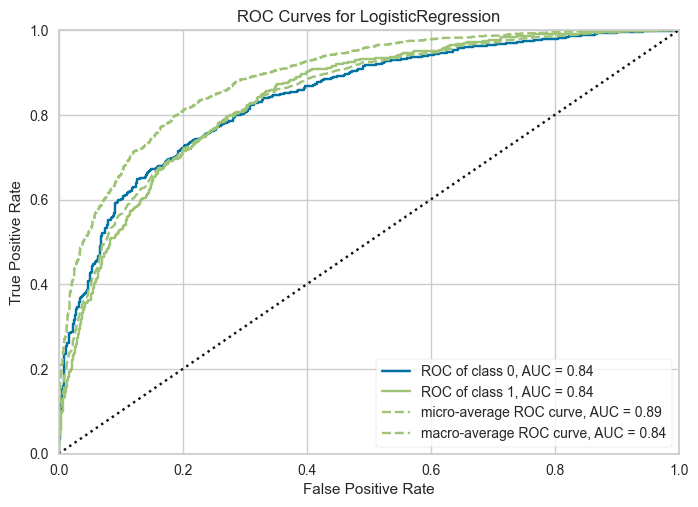

In [7]:
plot_model(best,plot='auc')

In [8]:
import mlflow

In [9]:
mlflow.end_run()


In [10]:
with mlflow.start_run():
    # Log the best model using mlflow.sklearn
    mlflow.sklearn.log_model(best, 'logistic_regression_model')

In [12]:
final_best_model = finalize_model(best)
save_model(final_best_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'SeniorCitizen',
                                              'tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
                  Log

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
X = data.drop(['Churn', 'customerID', 'Unnamed: 0'], axis=1)
y = data['Churn']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
categorical_columns = X_train.select_dtypes(include=['object']).columns


In [63]:
from sklearn.impute import SimpleImputer


In [64]:
imputer = SimpleImputer(strategy='most_frequent')  # You can use different strategies based on your needs
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [65]:
X_train_encoded = pd.get_dummies(X_train_imputed, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=categorical_columns)


In [66]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)


In [67]:
logistic_regression_model = LogisticRegression(random_state=42)

In [68]:
logistic_regression_model.fit(X_train_encoded, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
from sklearn.metrics import accuracy_score

y_pred = logistic_regression_model.predict(X_test_encoded)



In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.815471965933286


In [72]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(logistic_regression_model, model_file)

# Load the model
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(X_test_encoded)


In [73]:
predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [75]:
from sklearn.feature_selection import SelectFromModel
